In [ ]:
# pip install youtube-comment-downloader
# pip install textblob
# pip install streamlit
# pip install wordcloud

In [2]:
from youtube_comment_downloader import *
downloader = YoutubeCommentDownloader()

video_url = 'https://www.youtube.com/watch?v=vJefOB8kec8'

comments = downloader.get_comments_from_url(video_url)

comment_list = []
for i, comment in enumerate(comments):
    if i >= 300:
        break
    comment_list.append(comment['text'])

for i in range(10):
    print(f"{i+1}: {comment_list[i]}")


1: 🤖 Join my AI Course: https://academy.dhruvrathee.com/chatgpt
Learn to harness the power of ChatGPT effectively and transform your life! 
Use coupon code: TAKE41 for 41% discount! 
Hurry up! Offer only valid for the first 1000 people
2: Ssc k bare me video banaiye sir 🙏
3: 😮
4: Make video on ssc protest
5: Sir.. this is high time ek video ssc pe bhi bana dijiye..
6: Sir.. this is high time ek video ssc pe bhi bana dijiye..
7: Sir.. this is high time ek video ssc pe bhi bana dijiye..
8: Sir.. this is high time ek video ssc pe bhi bana dijiye..
9: Sir.. this is high time ek video ssc pe bhi bana dijiye..
10: Sir.. this is high time ek video ssc pe bhi bana dijiye..


In [3]:
import re
unique_comments = list(set(comment_list))
def clean_comment(comment):
    comment = comment.lower()                                 # Lowercase
    comment = re.sub(r"http\S+|www\S+|https\S+", '', comment) # Remove links
    comment = re.sub(r'@\w+|\#','', comment)                  # Remove mentions, hashtags
    comment = re.sub(r'[^\w\s]', '', comment)                 # Remove punctuation
    comment = re.sub(r'\d+', '', comment)                     # Remove numbers
    comment = re.sub(r'\s+', ' ', comment).strip()            # Remove extra spaces
    return comment

cleaned_comments = [clean_comment(c) for c in unique_comments]

# Show first 10 cleaned comments
for i in range(275):
    print(f"{i+1}: {cleaned_comments[i]}")


1: right sir
2: sir aapke course ka price bahut mahnga hai hum garib ke pass itna paisa bahut muskil se aata hai sir us paise me month ka rasan bhi nahi ho pata hai please sir course ko free kr dijiye hume bhi sikhna hai ai ke bare me please sir
3: hi dhruv can you please reduce the cost to within k
4: big fan brō
5: the great scientist in the world nambi narayana sir par video banao bhai please
6: dhruv is pregnant as he said in future every thing is possible
7: make video on ssc protest
8: bhai sab se zayada khatra to aap ki job ko hai
9: sir this is high time ek video ssc pe bhi bana dijiye
10: sir your courses too expensive
11: make a video on sects of every religion
12: we need this type of another video
13: sir mai chatgpt ko puri tarah se janna chahta hu plz aur videos banaye chatgpt par
14: sir chandrayan ke bare me video kb ayega i m waiting for this
15: bhai course ki prize kam kar do
16: having trouble getting my email verified on dhruvratheeacademy app
17: bhai onpassive co

In [4]:
import pandas as pd

# Assuming cleaned_comments contains your 275 cleaned strings
# You already have this from your loop:
# for i in range(275): print(f"{i+1}: {cleaned_comments[i]}")

# Now convert to DataFrame
df = pd.DataFrame(cleaned_comments, columns=["Comment"])
df
# Save to CSV
df.to_csv("youtube_comments_cleaned.csv", index=False)
print("✅ Comments saved successfully to youtube_comments_cleaned.csv")


✅ Comments saved successfully to youtube_comments_cleaned.csv


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd

# Read train.txt properly: file format is — text<TAB>emotion
df = pd.read_csv("train.txt", sep=";", header=None, names=["text", "emotion"], encoding='utf-8')

# Drop rows with missing text or emotion
df = df.dropna(subset=["text", "emotion"])

# Just to double-check
# print(df.head(), df.shape)
df


,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [7]:
X = df["text"]
y = df["emotion"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # limit words
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train_vec, y_train)


,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


Accuracy: 0.840625

Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.77      0.83       427
        fear       0.86      0.71      0.78       397
         joy       0.78      0.97      0.87      1021
        love       0.90      0.54      0.67       296
     sadness       0.88      0.94      0.91       946
    surprise       0.87      0.40      0.55       113

    accuracy                           0.84      3200
   macro avg       0.86      0.72      0.77      3200
weighted avg       0.85      0.84      0.83      3200



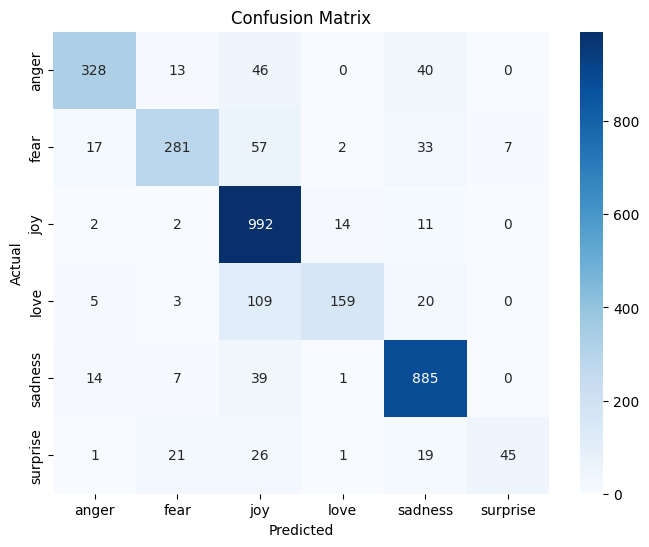

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test_vec)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


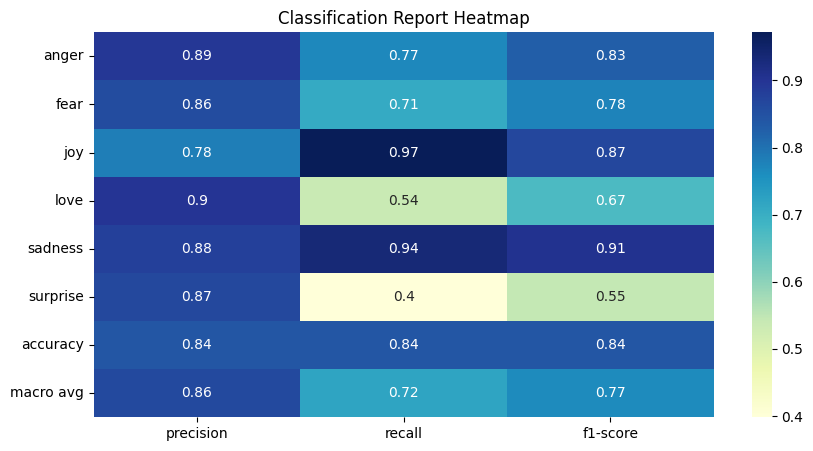

In [12]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()


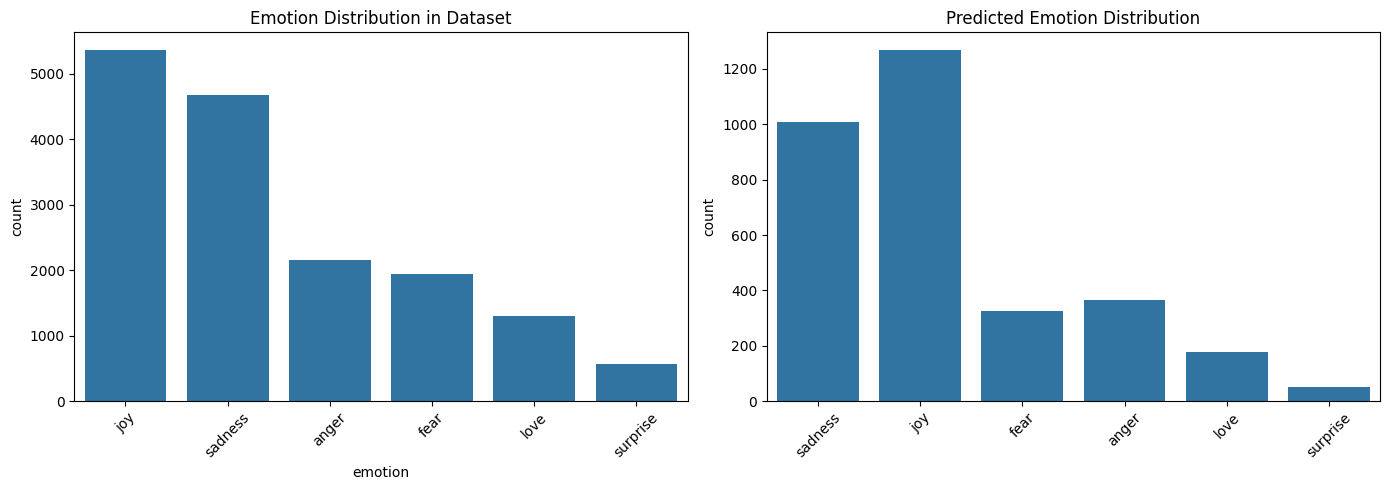

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))  # width=14, height=5

# Left Plot: Actual Emotion Distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index)
plt.title("Emotion Distribution in Dataset")
plt.xticks(rotation=45)

# Right Plot: Predicted Emotion Distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred)
plt.title("Predicted Emotion Distribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [14]:
df_youtube = pd.DataFrame(cleaned_comments, columns=["Comment"])
df_youtube

,Comment
0,right sir
1,sir aapke course ka price bahut mahnga hai hum...
2,hi dhruv can you please reduce the cost to wit...
3,big fan brō
4,the great scientist in the world nambi narayan...
...,...
270,ek video khuda ke bare bata o
271,i intrested in your course but smart phone se ...
272,sir please make video in hyperloop in next vid...
273,bhai aap tu tom cruise jaise dekh rahe ho


In [15]:
X_youtube = vectorizer.transform(df_youtube["Comment"])

In [16]:
df_youtube["Predicted Emotion"] = model.predict(X_youtube)

C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_12100\1196473163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_youtube, x="Predicted Emotion", order=df_youtube["Predicted Emotion"].value_counts().index, palette="Set2")


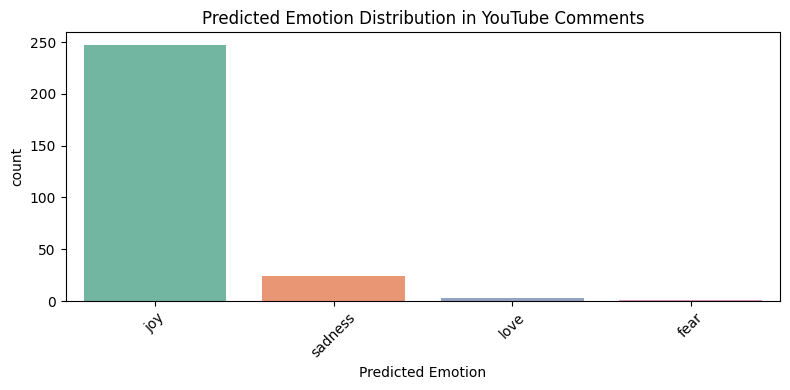

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=df_youtube, x="Predicted Emotion", order=df_youtube["Predicted Emotion"].value_counts().index, palette="Set2")
plt.title("Predicted Emotion Distribution in YouTube Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Show first 10 comments with their predicted emotion
print(df_youtube[['Comment', 'Predicted Emotion']].head(10))

                                             Comment Predicted Emotion
0                                          right sir           sadness
1  sir aapke course ka price bahut mahnga hai hum...               joy
2  hi dhruv can you please reduce the cost to wit...               joy
3                                        big fan brō               joy
4  the great scientist in the world nambi narayan...               joy
5  dhruv is pregnant as he said in future every t...               joy
6                          make video on ssc protest               joy
7     bhai sab se zayada khatra to aap ki job ko hai               joy
8  sir this is high time ek video ssc pe bhi bana...               joy
9                     sir your courses too expensive               joy


In [19]:
import joblib
# Save your trained model
joblib.dump(model, "emotion_model.pkl")
# Save your trained TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

for view in web run application app.py
